In [1]:
print("This is for Jack's rough code")

This is for Jack's rough code


In [2]:
#libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score

In [3]:
#import data
os.chdir("..")
data = pd.read_csv("data/bikedata.csv")
data.head()

,Unnamed: 0,TIME,NAME,BIKE.STANDS,AVAILABLE.BIKE.STANDS,AVAILABLE.BIKES,STATUS
0,1,2018-08-01 12:30:02,CHARLEMONT PLACE,40,28,12,Open
1,2,2018-08-01 12:35:02,CHARLEMONT PLACE,40,28,12,Open
2,3,2018-08-01 12:40:02,CHARLEMONT PLACE,40,28,12,Open
3,4,2018-08-01 12:45:02,CHARLEMONT PLACE,40,28,12,Open
4,5,2018-08-01 12:50:02,CHARLEMONT PLACE,40,28,12,Open


In [5]:
#Parse dates and times
data.TIME = pd.to_datetime(data.TIME, format = "%Y-%m-%d %H:%M:%S")
data["DATE"] = pd.DatetimeIndex(data.TIME.dt.date)
data.head()
#Calculate bike usage
data["BIKE.USAGE"] = data["AVAILABLE.BIKE.STANDS"]/data["BIKE.STANDS"]
data.head()

,Unnamed: 0,TIME,NAME,BIKE.STANDS,AVAILABLE.BIKE.STANDS,AVAILABLE.BIKES,STATUS,DATE,BIKE.USAGE
0,1,2018-08-01 12:30:02,CHARLEMONT PLACE,40,28,12,Open,2018-08-01,0.7
1,2,2018-08-01 12:35:02,CHARLEMONT PLACE,40,28,12,Open,2018-08-01,0.7
2,3,2018-08-01 12:40:02,CHARLEMONT PLACE,40,28,12,Open,2018-08-01,0.7
3,4,2018-08-01 12:45:02,CHARLEMONT PLACE,40,28,12,Open,2018-08-01,0.7
4,5,2018-08-01 12:50:02,CHARLEMONT PLACE,40,28,12,Open,2018-08-01,0.7


In [7]:
dataCP = data[data.NAME == "CHARLEMONT PLACE"]
dataSG = data[data.NAME == "ST. STEPHEN'S GREEN EAST"]
dataPR = data[data.NAME == "PHIBSBOROUGH ROAD"]
print(len(dataCP))
print(len(dataSG))
print(len(dataPR))


343469
342867
342924


In [24]:
CP_daily_avg = dataCP.groupby(pd.Grouper(key='DATE', freq='W'))['BIKE.USAGE'].mean()
CP_date_vector = pd.DatetimeIndex(dataCP["DATE"].dt.date)

PR_daily_avg = dataPR.groupby(pd.Grouper(key='DATE', freq='W'))['BIKE.USAGE'].mean()
PR_date_vector = pd.DatetimeIndex(dataPR["DATE"].dt.date)

SG_daily_avg = dataSG.groupby(pd.Grouper(key='DATE', freq='W'))['BIKE.USAGE'].mean()
SG_date_vector = pd.DatetimeIndex(dataSG["DATE"].dt.date)

Text(0.5, 1.0, "St. Stephen's Green East")

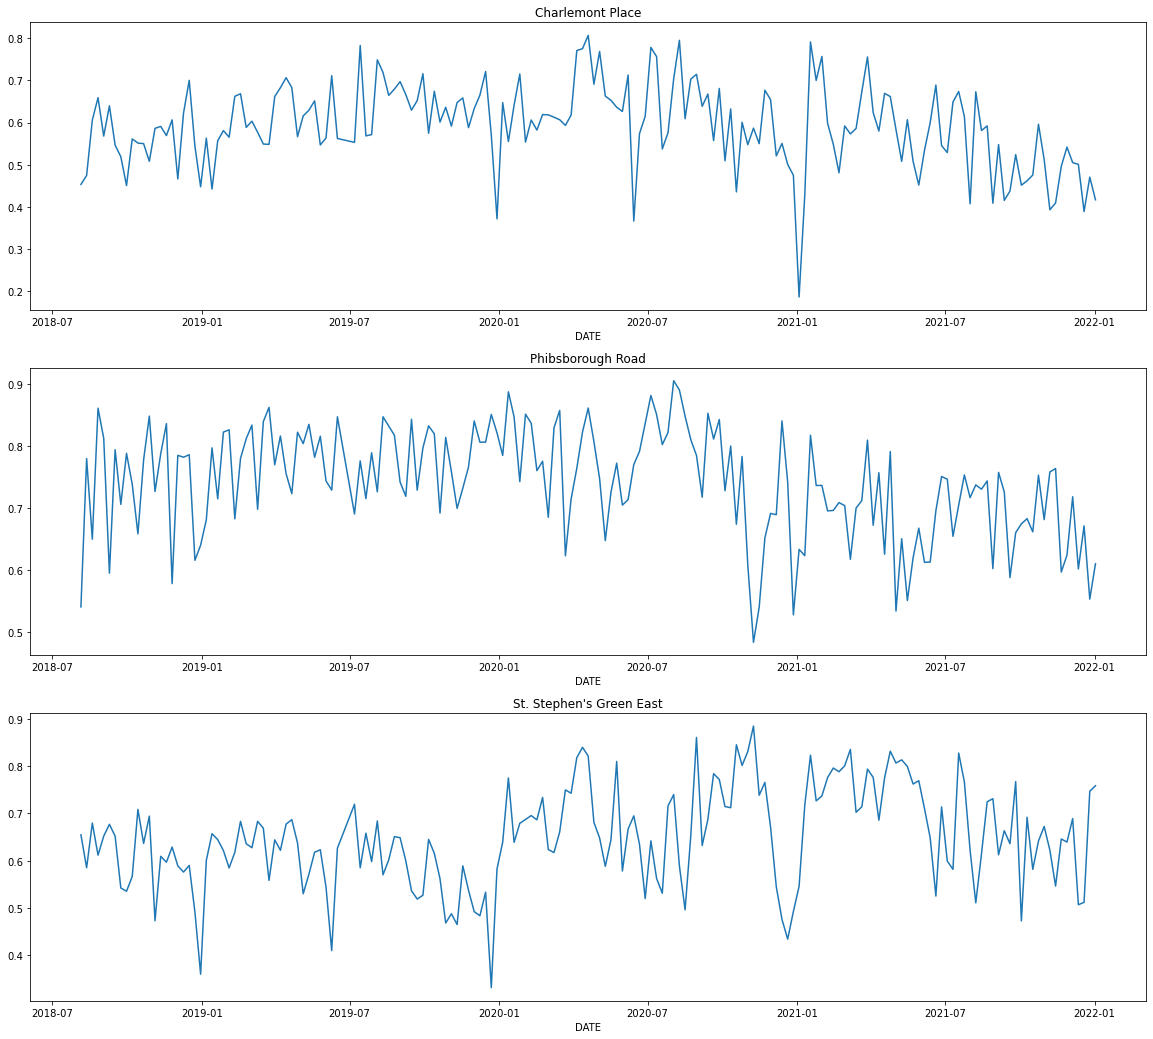

In [28]:
#datavis
usageFig, axes = plt.subplots(3, 1, figsize=(20,18))
sns.lineplot(ax=axes[0],x = CP_daily_avg.index, y = CP_daily_avg.values)
axes[0].set_title('Charlemont Place')
sns.lineplot(ax=axes[1],x = PR_daily_avg.index, y = PR_daily_avg.values)
axes[1].set_title('Phibsborough Road')
sns.lineplot(ax=axes[2],x = SG_daily_avg.index, y = SG_daily_avg.values)
axes[2].set_title("St. Stephen's Green East")
